# Social Media Sentiment Analysis Project
-> Problem Statement (Final Step After Conclusion - Rehab Responsibility)

---------------

## Step 1: Reading and Understanding the data.
Assigned to: Akayiz/Youstina

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sn
import re
from matplotlib.colors import LinearSegmentedColormap

In [5]:
df = pd.read_csv('sentimentdataset.csv')

In [6]:
df.shape

(732, 14)

In [7]:
df.head()

,ID,Text,Sentiment (Label),Timestamp,User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,1/15/2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,Negative,1/15/2023 8:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,Positive,1/15/2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,Positive,1/15/2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,1/15/2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [8]:
list(df.columns)

['ID',
 'Text',
 'Sentiment (Label)',
 'Timestamp',
 'User',
 'Source',
 'Topic',
 'Retweets',
 'Likes',
 'Country',
 'Year',
 'Month',
 'Day',
 'Hour']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 732 non-null    int64 
 1   Text               732 non-null    object
 2   Sentiment (Label)  732 non-null    object
 3   Timestamp          732 non-null    object
 4   User               732 non-null    object
 5   Source             732 non-null    object
 6   Topic              732 non-null    object
 7   Retweets           732 non-null    int64 
 8   Likes              732 non-null    int64 
 9   Country            732 non-null    object
 10  Year               732 non-null    int64 
 11  Month              732 non-null    int64 
 12  Day                732 non-null    int64 
 13  Hour               732 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 80.2+ KB


## Dropping unnecessary columns

- **ID:** Redundant since pandas generates an equivalent row
- **Timestamp:** All the info inside it is available in columns (Year, Month, Day, Hour) except the minutes, which we believe is not useful since no trends last for less than an hour

In [10]:
df.drop(['ID', 'Timestamp'], axis=1, inplace=True)

## Checking missing/null values

In [11]:
df.isna().sum().sort_values(ascending = False)

Text                 0
Sentiment (Label)    0
User                 0
Source               0
Topic                0
Retweets             0
Likes                0
Country              0
Year                 0
Month                0
Day                  0
Hour                 0
dtype: int64

### Based on the above; we can deduce that we have no null values in our data

## Checking duplicated rows

In [12]:
df[df.duplicated()]

,Text,Sentiment (Label),User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour
279,"Proudly scaling the peaks of achievement, a m...",Proud,PeakConqueror,Twitter,#Proud #ScalingPeaks,23,46,USA,2020,1,5,8
280,"Embraced by the hopeful dawn, a gardener sowi...",Hopeful,DawnGardener,Instagram,#Hopeful #SeedsOfOptimism,14,28,UK,2022,7,17,6
281,"A playful escapade in the carnival of life, c...",Playful,CarnivalDreamer,Facebook,#Playful #CarnivalEscapade,24,48,Australia,2018,8,22,17
282,"Floating on clouds of inspiration, an artist ...",Inspired,SkyArtist,Twitter,#Inspired #CloudsOfCreativity,18,36,India,2021,12,8,14
283,"Navigating the river of contentment, a serene...",Contentment,RiverNavigator,Instagram,#Contentment #TranquilWaters,20,40,Canada,2019,4,27,9
284,"With empathy as a lantern, wandering through ...",Empathetic,LanternWanderer,Facebook,#Empathetic #LanternOfCompassion,16,32,USA,2023,9,3,21
285,"A free spirit soaring on the wings of dreams,...",Free-spirited,DreamSoarer,Twitter,#FreeSpirit #WingsOfDreams,22,44,UK,2020,6,10,10
286,"Bathed in the golden hues of gratefulness, a ...",Grateful,SunsetAdmirer,Instagram,#Grateful #GoldenHues,19,38,Australia,2022,4,1,18
287,"Confident strides in the dance of life, a bal...",Confident,DanceStrider,Facebook,#Confident #DanceOfLife,23,46,Canada,2021,1,15,13
288,"Hopeful whispers of wind, carrying the promis...",Hopeful,WindWhisperer,Twitter,#Hopeful #BrighterTomorrows,15,30,India,2023,5,6,7


In [13]:
df[df.duplicated()].shape

(20, 12)

### Based on the above there are 21 duplicated rows that need to be removed

***************************************************************
## Description of numeric data

In [14]:
df.describe()

,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


## Checking all features/columns and noting if they contain any issues

#### ``Text Column:``

In [15]:
df['Text'].head()

0     Enjoying a beautiful day at the park!        ...
1     Traffic was terrible this morning.           ...
2     Just finished an amazing workout! 💪          ...
3     Excited about the upcoming weekend getaway!  ...
4     Trying out a new recipe for dinner tonight.  ...
Name: Text, dtype: object

#### Text column doesn't contain any irrelevent data, but need to be able to process emojis correctly, in the column they are in unicode characters

#### ``Sentiment (Label):``

In [16]:
df['Sentiment (Label)'].value_counts()

Sentiment (Label)
Positive           44
Joy                42
Excitement         32
Neutral            14
Contentment        14
                   ..
Adrenaline          1
Harmony             1
ArtisticBurst       1
Radiance            1
Elegance            1
Name: count, Length: 279, dtype: int64

#### The target column consists of 279 different classes which is definitely bad for such a small data because some classes appear only once.

#### ``Source:``

In [17]:
df['Source'].value_counts()

Source
Instagram     258
Facebook      231
Twitter       128
Twitter       115
Name: count, dtype: int64

#### Need to merge the two "Twitter"'s together (Note: 1 of the twitter's has a single space after it and the other has 2 spaces after it)

#### ``Topic:``

In [18]:
df['Topic'].value_counts()

Topic
#Compassionate #TearsOfEmpathy                  3
#Proud #ScalingPeaks                            3
#Hopeful #SeedsOfOptimism                       3
#Playful #CarnivalEscapade                      3
#Contentment #TranquilWaters                    2
                                               ..
#Acceptance #BeautifulChaos                     1
#Determination #ExtraordinaryPath               1
#Serenity #RaindropMelody                       1
#Curiosity #SeekerOfKnowledge                   1
#VirtualEntertainment #HighSchoolPositivity     1
Name: count, Length: 697, dtype: int64

#### Topic column needs to be split into two, as for example the combo of #Compassionate #TearsOfEmpathy occured 3 times, but that doesn't mean that #Compassionate occured 3 times only 

#### ``Retweets:``

In [19]:
df['Retweets'].value_counts().sort_index(ascending=False)

Retweets
40     16
35     41
30     55
28     50
27      2
26      5
25     75
24      8
23     12
22    106
21     10
20     67
19      9
18     93
17      5
16      9
15     74
14     15
13      5
12     29
11      1
10     21
9       3
8      12
7       7
5       2
Name: count, dtype: int64

#### ``Likes:``

In [20]:
df['Likes'].value_counts().sort_index(ascending=False)

Likes
80    16
70    41
60    55
55    50
52     2
51     1
50    75
49     1
48     9
47     1
46     6
45    94
44    10
43     6
42     9
41     2
40    62
39     6
38     7
37     3
36    16
35    77
34     4
33     1
32     8
31     1
30    73
28    15
27     1
26     5
25    23
24     6
22     1
20    21
18     3
16     2
15    17
10     2
Name: count, dtype: int64

#### The ``Retweets`` and ``Likes`` features/columns have no issues with them

#### ``Country:``

In [21]:
df['Country'].value_counts()

Country
USA               59
USA               55
UK                49
Canada            44
Australia         41
                  ..
Netherlands        1
USA                1
Germany            1
France             1
USA                1
Name: count, Length: 115, dtype: int64

#### Need to combine duplicated country keys into 1 key (Remove multiple USAs and make them 1 USA) (Note: The trick here is also with trailing spaces after each country)

#### ``Year:``

In [22]:
df['Year'].value_counts().sort_index(ascending=False)

Year
2023    289
2022     63
2021     63
2020     69
2019     73
2018     56
2017     43
2016     38
2015     19
2014      4
2013      4
2012      4
2011      4
2010      3
Name: count, dtype: int64

#### ``Month:``

In [23]:
df['Month'].value_counts().sort_index(ascending=False)

Month
12    39
11    49
10    48
9     77
8     78
7     62
6     71
5     46
4     51
3     44
2     85
1     82
Name: count, dtype: int64

#### ``Day:``

In [24]:
df['Day'].value_counts().sort_index(ascending=False)

Day
31     5
30    23
29    11
28    59
27    12
26    10
25    23
24    11
23    10
22    39
21    10
20    39
19    14
18    49
17    17
16    11
15    73
14    13
13     7
12    38
11    11
10    63
9      5
8     34
7     11
6      7
5     48
4      5
3     21
2     27
1     26
Name: count, dtype: int64

#### ``Hour:``

In [25]:
df['Hour'].value_counts().sort_index(ascending=False)

Hour
23     7
22    33
21    41
20    50
19    75
18    65
17    48
16    69
15    47
14    94
13    30
12    38
11    37
10    30
9     28
8     23
7      7
6      4
5      1
3      3
2      1
0      1
Name: count, dtype: int64

#### The ``Year``, ``Month``, ``Day``, and ``Hour`` features/columns have no issues with them

------

## Step 2: Data Cleaning and Preprocessing
Assigned to: David/Zedan

##### Issues to solve:
* Stripping Spaces from all columns that contain text:
     * Source  
     * Country
     * Topic
     * User
     * Sentiment
* Dropping Duplicates.
* Separating the Topic Hashtags for further analysis.



1. Stripping Spaces

In [26]:
df['Sentiment (Label)']= df['Sentiment (Label)'].str.strip()
df['User']= df['User'].str.strip()
df['Source']= df['Source'].str.strip()
df['Topic']= df['Topic'].str.strip()
df['Country']= df['Country'].str.strip()

2. Dropping Duplicates

In [27]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

3. Extracting Hashtags

In [28]:
def extract_hashtags(text):
  matches = re.findall(r"#(\w+)", text)
  return matches[:2]

df[['hashtag1', 'hashtag2']] = df['Topic'].apply(extract_hashtags).tolist()

df[['hashtag1', 'hashtag2']]

,hashtag1,hashtag2
0,Nature,Park
1,Traffic,Morning
2,Fitness,Workout
3,Travel,Adventure
4,Cooking,Food
...,...,...
727,ScienceFairWinner,HighSchoolScience
728,SurpriseCelebration,HighSchoolFriendship
729,CommunityGiving,HighSchoolPhilanthropy
730,CulturalCelebration,HighSchoolUnity


-----

## Step 3: Exploratory Data Analysis
Assigned to: Amany/Rehab/Zedan

## Data's Columns after cleaning

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 0 to 731
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Text               711 non-null    object
 1   Sentiment (Label)  711 non-null    object
 2   User               711 non-null    object
 3   Source             711 non-null    object
 4   Topic              711 non-null    object
 5   Retweets           711 non-null    int64 
 6   Likes              711 non-null    int64 
 7   Country            711 non-null    object
 8   Year               711 non-null    int64 
 9   Month              711 non-null    int64 
 10  Day                711 non-null    int64 
 11  Hour               711 non-null    int64 
 12  hashtag1           711 non-null    object
 13  hashtag2           711 non-null    object
dtypes: int64(6), object(8)
memory usage: 83.3+ KB


In [30]:
df.head()

,Text,Sentiment (Label),User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour,hashtag1,hashtag2
0,Enjoying a beautiful day at the park! ...,Positive,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12,Nature,Park
1,Traffic was terrible this morning. ...,Negative,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8,Traffic,Morning
2,Just finished an amazing workout! 💪 ...,Positive,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15,Fitness,Workout
3,Excited about the upcoming weekend getaway! ...,Positive,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18,Travel,Adventure
4,Trying out a new recipe for dinner tonight. ...,Neutral,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19,Cooking,Food


In [31]:
df.tail()

,Text,Sentiment (Label),User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour,hashtag1,hashtag2
727,Collaborating on a science project that receiv...,Happy,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20,39,UK,2017,8,18,18,ScienceFairWinner,HighSchoolScience
728,Attending a surprise birthday party organized ...,Happy,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48,USA,2018,6,22,14,SurpriseCelebration,HighSchoolFriendship
729,Successfully fundraising for a school charity ...,Happy,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42,Canada,2019,4,5,17,CommunityGiving,HighSchoolPhilanthropy
730,"Participating in a multicultural festival, cel...",Happy,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21,43,UK,2020,2,29,20,CulturalCelebration,HighSchoolUnity
731,Organizing a virtual talent show during challe...,Happy,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,24,47,USA,2020,11,15,15,VirtualEntertainment,HighSchoolPositivity


## Diving deeper to gain a better grasp of the data.
By asking insightful questions, we can identify the best ways to visualize the data.

### Which social media platform is used the most?

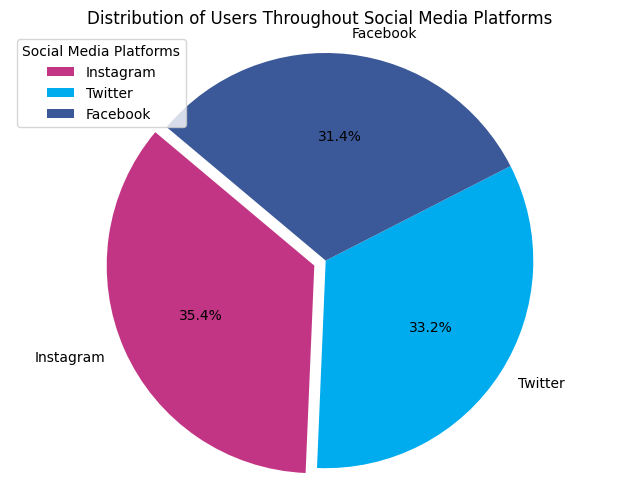

In [32]:
source_counts = df['Source'].value_counts().sort_values(ascending=False)

total_users = source_counts.sum()
colors = {'Facebook': '#3B5998', 'Twitter': '#00ACEE', 'Instagram': '#C13584'}
plt.figure(figsize=(8, 6))
plt.pie(source_counts, labels=source_counts.index, autopct="%1.1f%%", startangle=140,explode=[0.06, 0, 0], colors=[colors[platform] for platform in source_counts.index])

plt.title('Distribution of Users Throughout Social Media Platforms')
plt.legend(title='Social Media Platforms')

plt.axis('equal')
plt.show()

- From this graph, we can conclude that `Instagram` is the most used social media platform.
- Data can be divide our into 3 classes, each one represents a only one social media platform. 

### Dividing our Data into 3 Classes Based on the Social Media Platforms

#### Instagram

In [33]:
instagram_df = df[df['Source'] == 'Instagram']
instagram_df = instagram_df.reset_index(drop=True)
instagram_df.head()

,Text,Sentiment (Label),User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour,hashtag1,hashtag2
0,Just finished an amazing workout! 💪 ...,Positive,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15,Fitness,Workout
1,Trying out a new recipe for dinner tonight. ...,Neutral,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19,Cooking,Food
2,The new movie release is a must-watch! ...,Positive,MovieBuff,Instagram,#MovieNight #MustWatch,15,30,USA,2023,1,16,19,MovieNight,MustWatch
3,Just published a new blog post. Check it out!...,Positive,BloggerX,Instagram,#Blogging #NewPost,22,45,USA,2023,1,17,15,Blogging,NewPost
4,"New year, new fitness goals! 💪 ...",Positive,FitJourney,Instagram,#NewYear #FitnessGoals,28,55,USA,2023,1,18,18,NewYear,FitnessGoals


#### Twitter

In [34]:
twitter_df = df[df['Source'] == 'Twitter']
twitter_df = twitter_df.reset_index(drop=True)
twitter_df.head()

,Text,Sentiment (Label),User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour,hashtag1,hashtag2
0,Enjoying a beautiful day at the park! ...,Positive,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12,Nature,Park
1,Traffic was terrible this morning. ...,Negative,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8,Traffic,Morning
2,Feeling grateful for the little things in lif...,Positive,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25,50,India,2023,1,16,9,Gratitude,PositiveVibes
3,Political discussions heating up on the timel...,Negative,DebateTalk,Twitter,#Politics #Debate,30,60,USA,2023,1,17,8,Politics,Debate
4,Feeling a bit under the weather today. ...,Negative,WellnessCheck,Twitter,#SickDay #Health,7,15,Canada,2023,1,18,10,SickDay,Health


#### Facebook

In [35]:
facebook_df = df[df['Source'] == 'Facebook']
facebook_df = facebook_df.reset_index(drop=True)
facebook_df.head()

,Text,Sentiment (Label),User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour,hashtag1,hashtag2
0,Excited about the upcoming weekend getaway! ...,Positive,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18,Travel,Adventure
1,Rainy days call for cozy blankets and hot coc...,Positive,RainyDays,Facebook,#RainyDays #Cozy,10,20,Canada,2023,1,16,14,RainyDays,Cozy
2,Missing summer vibes and beach days. ...,Neutral,BeachLover,Facebook,#Summer #BeachDays,18,35,Australia,2023,1,17,12,Summer,BeachDays
3,Exploring the city's hidden gems. ...,Positive,UrbanExplorer,Facebook,#CityExplore #HiddenGems,12,25,UK,2023,1,18,14,CityExplore,HiddenGems
4,Reflecting on the past and looking ahead. ...,Positive,Reflections,Facebook,#Reflection #Future,20,40,USA,2023,1,19,13,Reflection,Future


### Which countries have the most users for each social media platform?

#### Instagram:

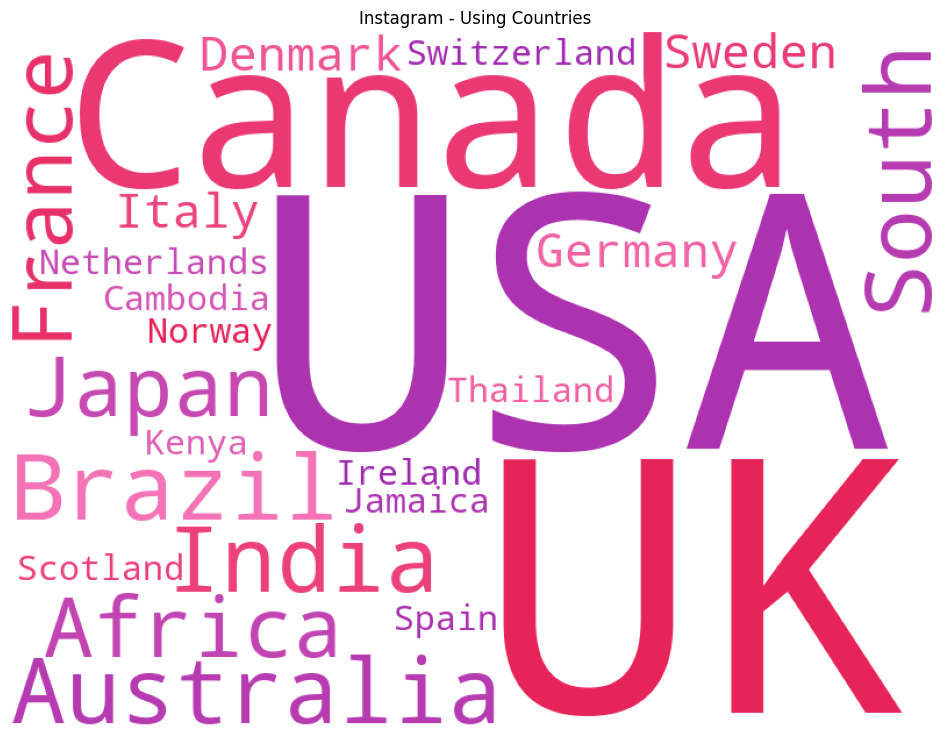

In [36]:
instagram_colors = ["#E41A4F", "#F472B6", "#9B23AF"]
custom_colormap = LinearSegmentedColormap.from_list("custom", instagram_colors)
country_counts = instagram_df['Country'].value_counts()

wordcloud = WordCloud(background_color='white',
                      colormap=custom_colormap,width=800, height=600).generate(' '.join(country_counts.index))

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Instagram - Using Countries")
plt.show()

#### Twitter:

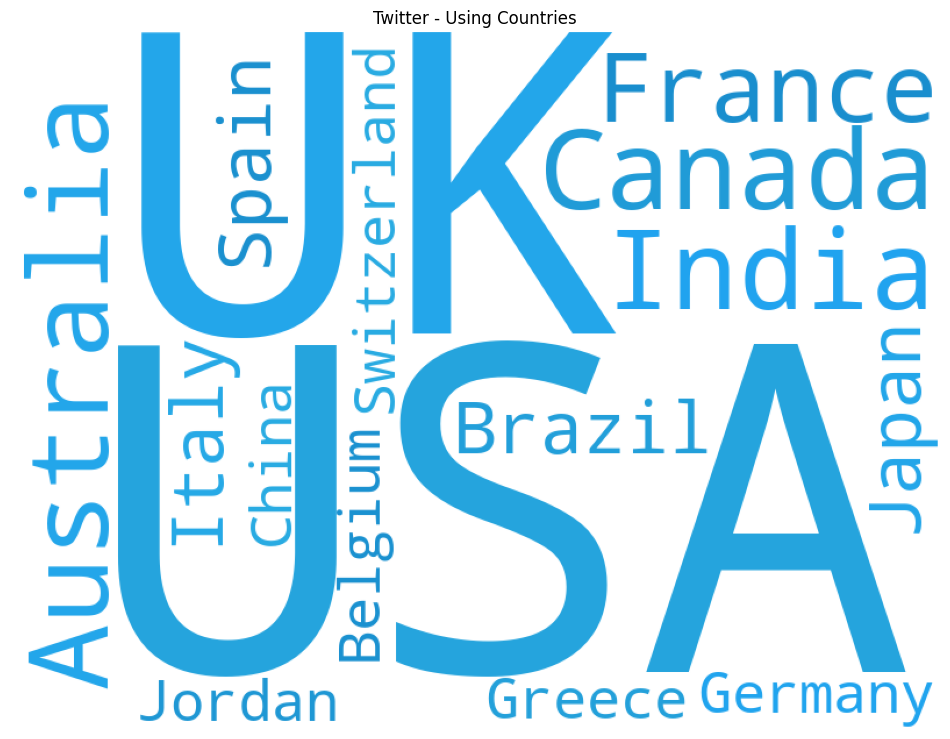

In [37]:
twitter_colors = ["#1DA1F2", "#29abe2", "#178bcc"]
custom_colormap = LinearSegmentedColormap.from_list("custom", twitter_colors)
country_counts = twitter_df['Country'].value_counts()

wordcloud = WordCloud(background_color='white',
                      colormap=custom_colormap,width=800, height=600).generate(' '.join(country_counts.index))

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Twitter - Using Countries")
plt.show()

#### Facebook:

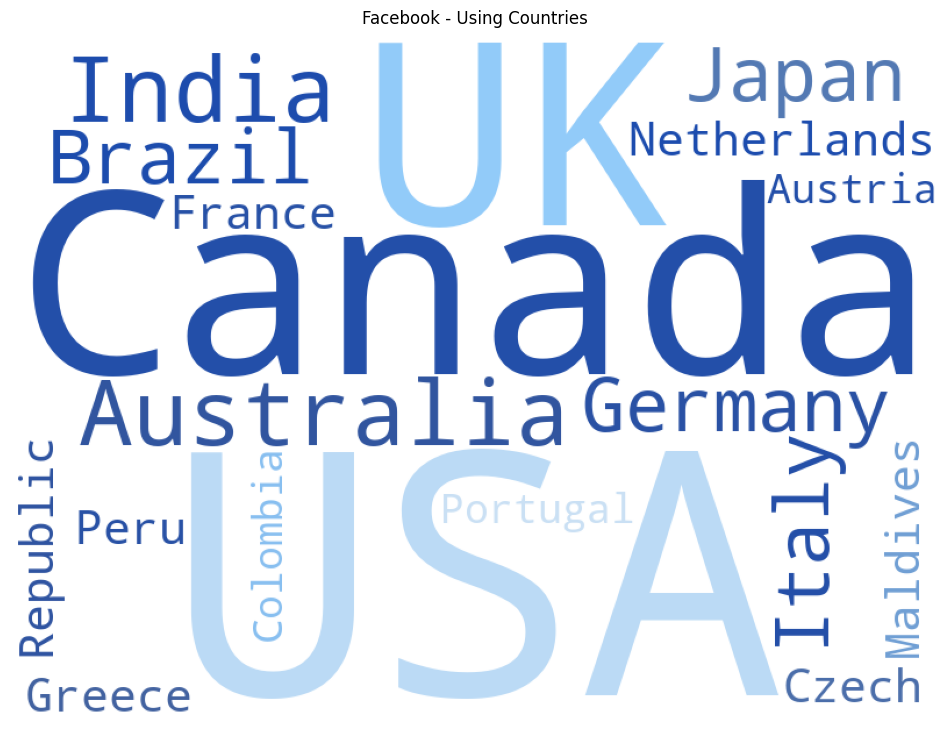

In [38]:
facebook_colors = ["#D2E3F3", "#90CAF9", "#3B5998", "#1A4BAF"]
custom_colormap = LinearSegmentedColormap.from_list("custom", facebook_colors)
country_counts = facebook_df['Country'].value_counts()

wordcloud = WordCloud(background_color='white',
                       colormap=custom_colormap,width=800, height=600).generate(' '.join(country_counts.index))

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Facebook - Using Countries")
plt.show()

### What is The Most Dominant Sentiment at each hour per day?

#### Instagram

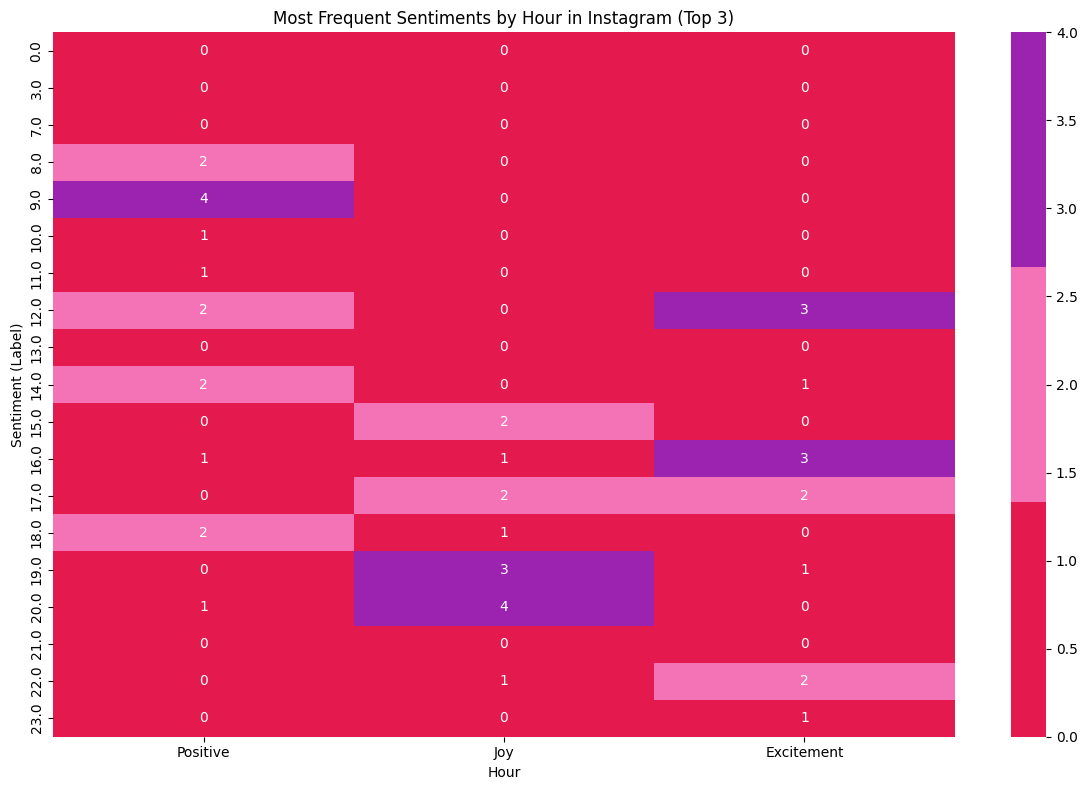

In [39]:
instagram_df['Hour'] = pd.to_numeric(twitter_df['Hour'], errors='coerce')

sentiment_counts = (
    instagram_df.groupby(['Hour', 'Sentiment (Label)'])['Sentiment (Label)']
    .count()
    .unstack(fill_value=0)
)
plt.figure(figsize=(12, 8))
top_sentiments = sentiment_counts.sum(axis=0).sort_values(ascending=False).head(3).index

filtered_counts = sentiment_counts[top_sentiments]
sn.heatmap(filtered_counts, annot=True, cmap = instagram_colors)
plt.xlabel("Hour")
plt.ylabel("Sentiment (Label)")
plt.title("Most Frequent Sentiments by Hour in Instagram (Top 3)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Twitter

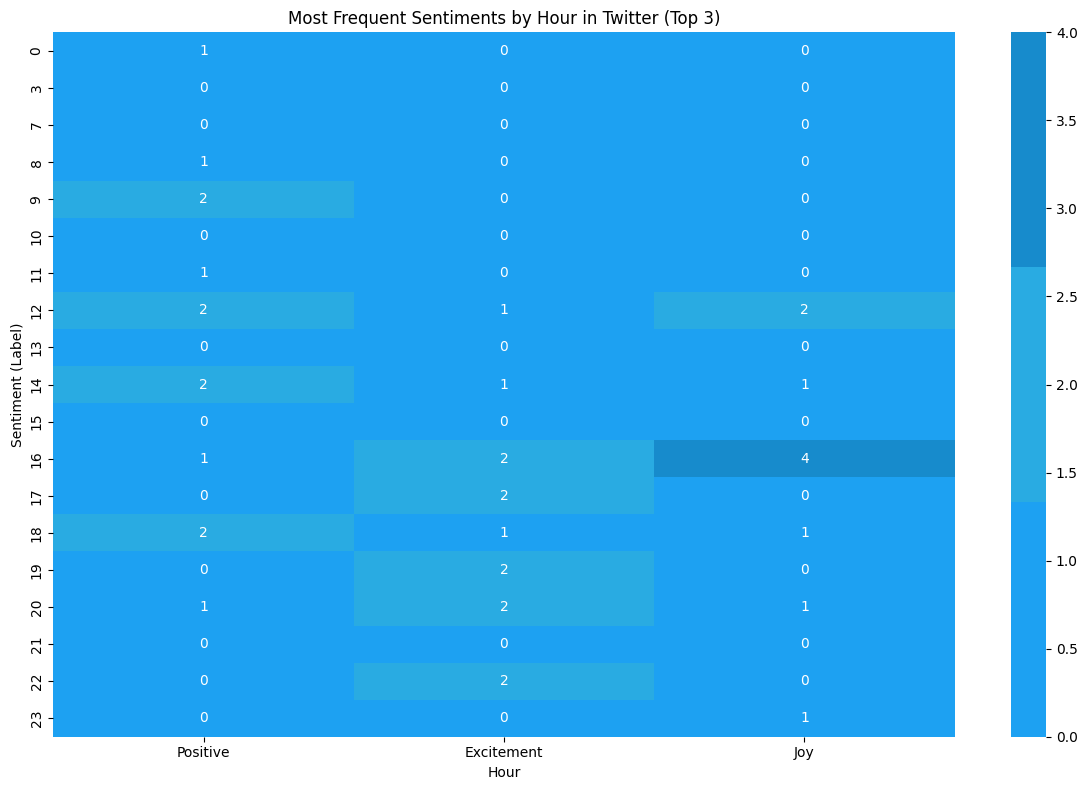

In [40]:
twitter_df['Hour'] = pd.to_numeric(twitter_df['Hour'], errors='coerce')

sentiment_counts = (
    twitter_df.groupby(['Hour', 'Sentiment (Label)'])['Sentiment (Label)']
    .count()
    .unstack(fill_value=0)
)

plt.figure(figsize=(12, 8))
top_sentiments = sentiment_counts.sum(axis=0).sort_values(ascending=False).head(3).index

filtered_counts = sentiment_counts[top_sentiments]

sn.heatmap(filtered_counts, annot=True, cmap=twitter_colors)
plt.xlabel("Hour")
plt.ylabel("Sentiment (Label)")
plt.title("Most Frequent Sentiments by Hour in Twitter (Top 3)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Facebook

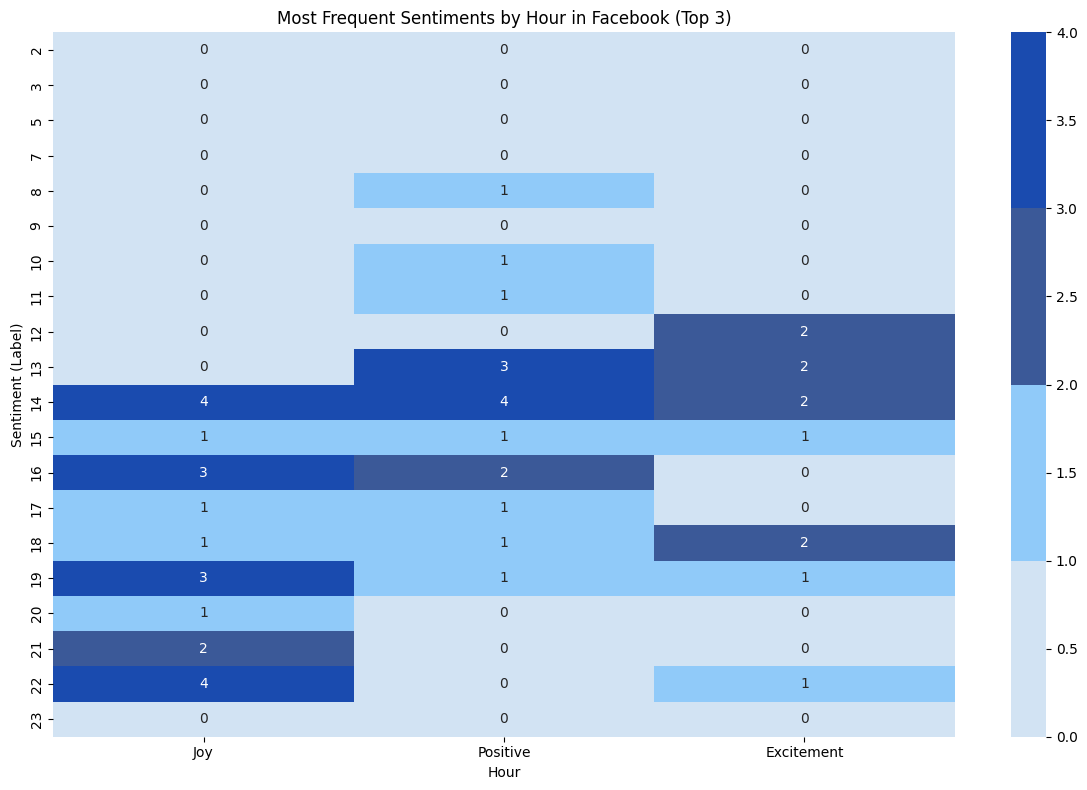

In [41]:
facebook_df['Hour'] = pd.to_numeric(facebook_df['Hour'], errors='coerce')

sentiment_counts = (
    facebook_df.groupby(['Hour', 'Sentiment (Label)'])['Sentiment (Label)']
    .count()
    .unstack(fill_value=0)
)

plt.figure(figsize=(12, 8))
top_sentiments = sentiment_counts.sum(axis=0).sort_values(ascending=False).head(3).index

filtered_counts = sentiment_counts[top_sentiments]
sn.heatmap(filtered_counts, annot=True, cmap=facebook_colors)
plt.xlabel("Hour")
plt.ylabel("Sentiment (Label)")
plt.title("Most Frequent Sentiments by Hour in Facebook (Top 3)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [42]:
# Group data by hour and count sentiment occurrences (without encoding)
sentiment_by_year = df.groupby('Hour')['Sentiment (Label)'].value_counts().unstack(fill_value=0)
def get_max_column_and_value(df):
  """
  This function takes a DataFrame and returns a Series containing:
    - Index: The names of the columns with the maximum value(s)
    - Values: The corresponding maximum value(s)
  """
  # Find the maximum value(s) for each column
  max_values = df.max(axis=0)

  # Identify columns with the maximum value(s) using boolean indexing
  max_cols = df.eq(max_values, axis=0).any(axis=0)

  # Combine column names and maximum values into a Series
  return pd.Series(max_values[max_cols], index=max_cols.index[max_cols])

max_sentiment = get_max_column_and_value(sentiment_by_year)

max_sentiment

#sentiment_by_year
# plt.figure(figsize=(8, 6))
# plt.bar(sentiment_by_year.index,sentiment_by_year['dominant'])
# plt.xlabel('Hour of the Day')
# plt.ylabel('Sentiment Count')
# plt.title('Most Frequent Sentiment Distribution by Hour')
# plt.xticks(rotation=0)  
# plt.legend(title='Sentiment')  
# plt.grid(axis='y')  
# plt.tight_layout()  
# plt.show()

Series([], dtype: int64)

### What are The Most Frequent Hashtags?

#### Instagram

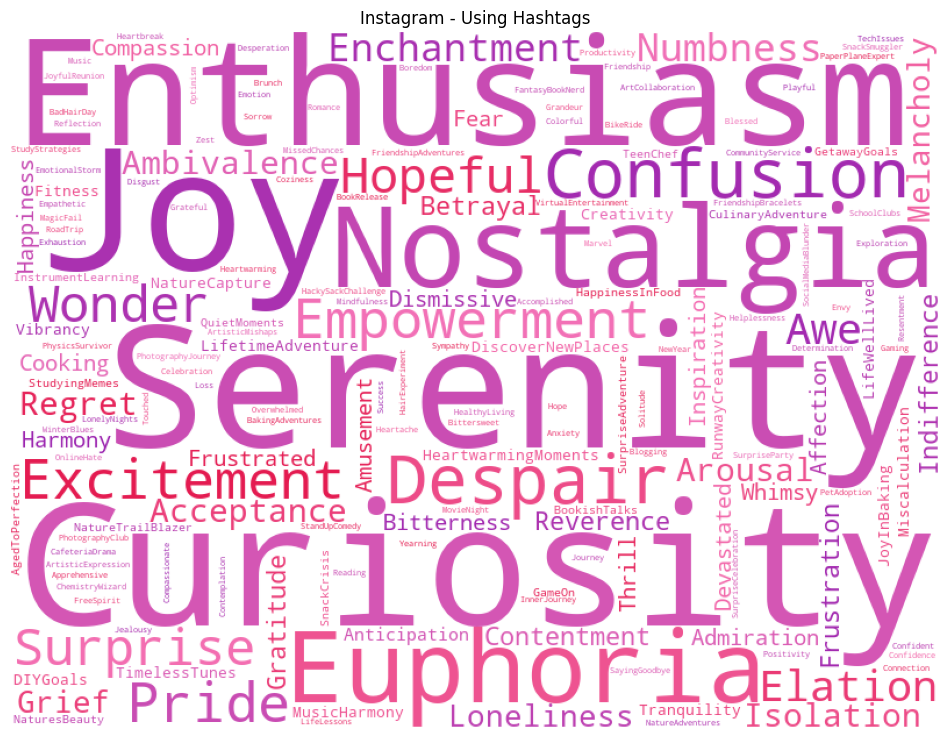

In [43]:
custom_colormap = LinearSegmentedColormap.from_list("custom", instagram_colors)
hashtags_counts = instagram_df['hashtag1'].value_counts()

wordcloud = WordCloud(background_color='white',
                      colormap=custom_colormap,width=800, height=600).generate(' '.join(hashtags_counts.index))

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Instagram - Using Hashtags")
plt.show()

#### Twitter

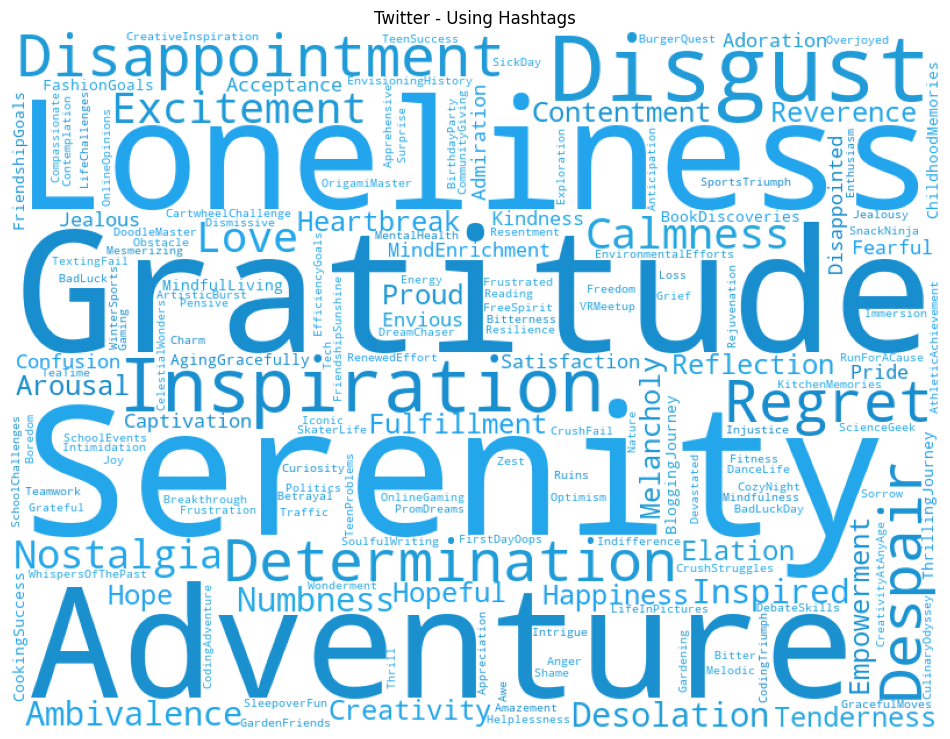

In [44]:
custom_colormap = LinearSegmentedColormap.from_list("custom", twitter_colors)
hashtag_counts = twitter_df['hashtag1'].value_counts()

wordcloud = WordCloud(background_color='white',
                      colormap=custom_colormap,width=800, height=600).generate(' '.join(hashtag_counts.index))

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Twitter - Using Hashtags")
plt.show()

#### Facebook

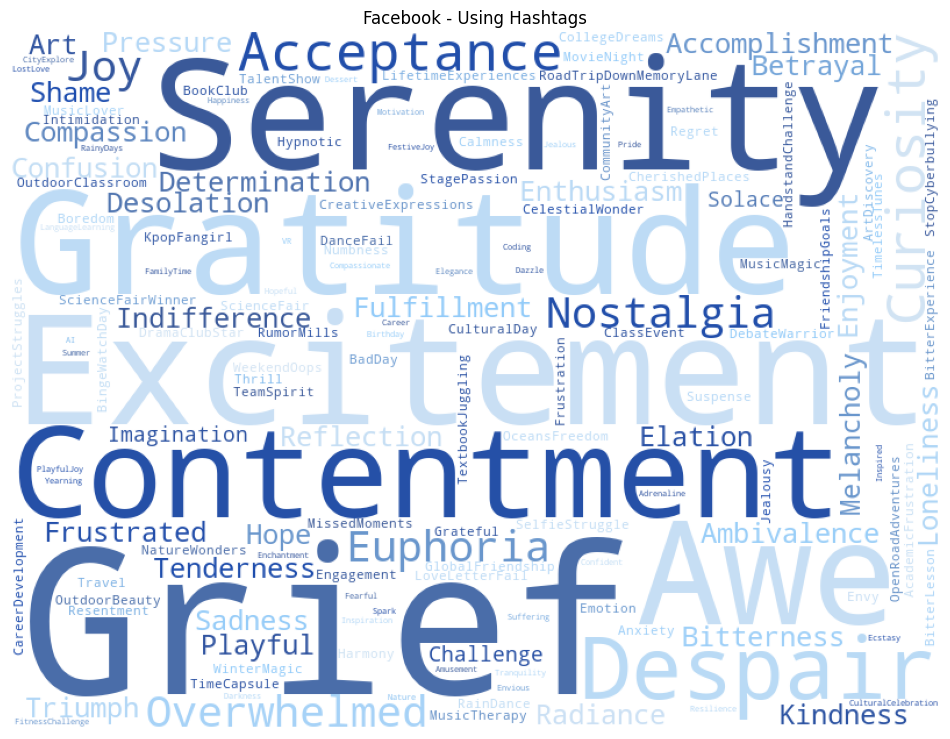

In [45]:
custom_colormap = LinearSegmentedColormap.from_list("custom", facebook_colors)
hashtag_counts = facebook_df['hashtag1'].value_counts()

wordcloud = WordCloud(background_color='white',  
                      colormap=custom_colormap,width=800, height=600).generate(' '.join(hashtag_counts.index))

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Facebook - Using Hashtags")
plt.show()

------

### Distribution of Likes Across Sentiment Labels (Top 3)

#### Instagram

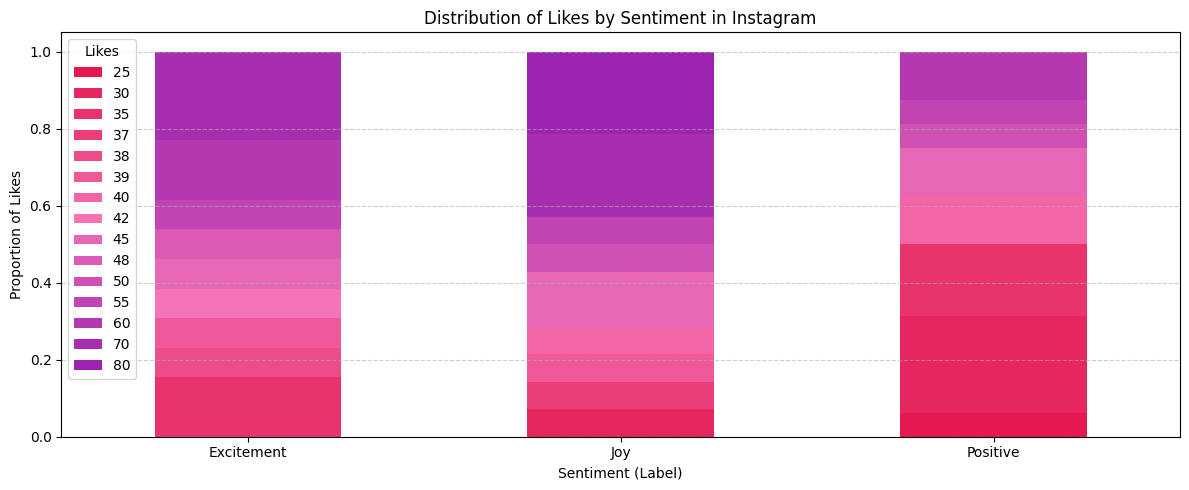

In [46]:
likes_sentiments = pd.crosstab(
    instagram_df[instagram_df["Sentiment (Label)"].isin(top_sentiments)]["Sentiment (Label)"],
    instagram_df["Likes"],
    normalize=0,
)
likes_sentiments.plot.bar(
    stacked=True,
    figsize=(12, 5),
    colormap=LinearSegmentedColormap.from_list("", instagram_colors),
    title="Distribution of Likes by Sentiment in Instagram"
)

plt.xlabel("Sentiment (Label)")
plt.ylabel("Proportion of Likes")
plt.xticks(rotation=0)
plt.legend(title="Likes", loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

#### Twitter

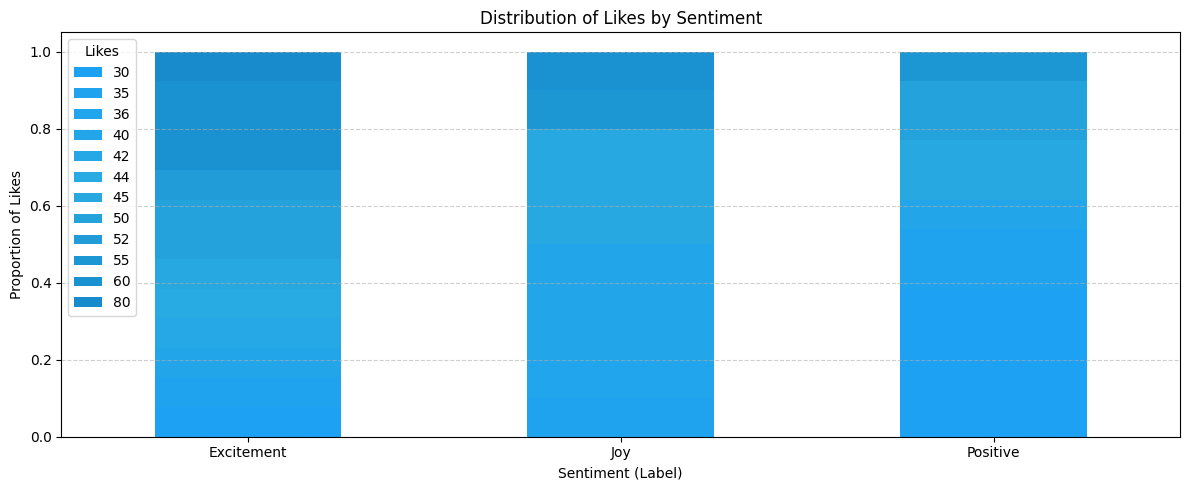

In [47]:
likes_sentiments = pd.crosstab(
    twitter_df[twitter_df["Sentiment (Label)"].isin(top_sentiments)]["Sentiment (Label)"],
    twitter_df["Likes"],
    normalize=0,
)
likes_sentiments.plot.bar(
    stacked=True,
    figsize=(12, 5),
    colormap=LinearSegmentedColormap.from_list("", twitter_colors),
    title="Distribution of Likes by Sentiment"
)

plt.xlabel("Sentiment (Label)")
plt.ylabel("Proportion of Likes")
plt.xticks(rotation=0)
plt.legend(title="Likes", loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

#### Facebook

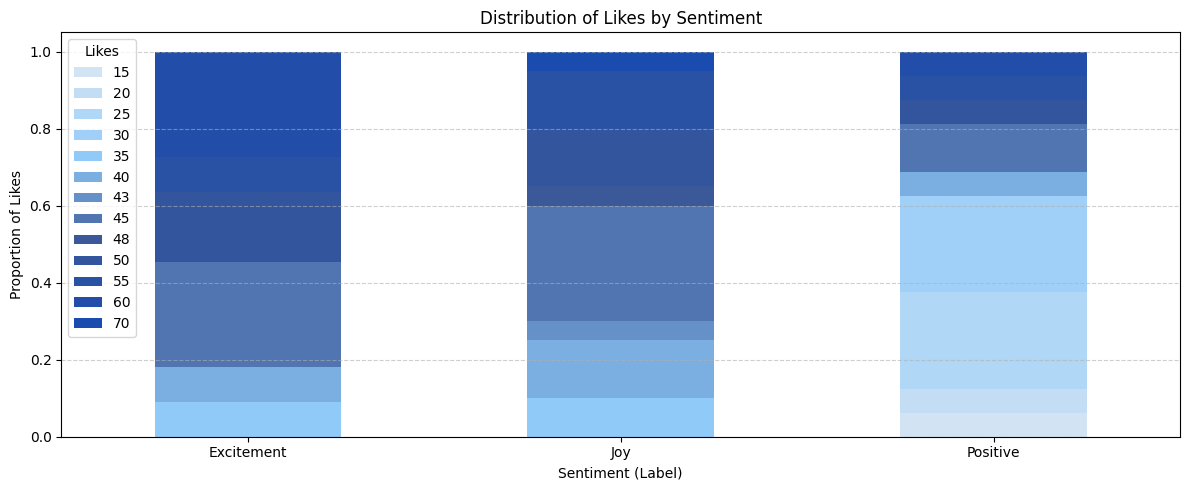

In [48]:
likes_sentiments = pd.crosstab(
    facebook_df[facebook_df["Sentiment (Label)"].isin(top_sentiments)]["Sentiment (Label)"],
    facebook_df["Likes"],
    normalize=0,
)
likes_sentiments.plot.bar(
    stacked=True,
    figsize=(12, 5),
    colormap=LinearSegmentedColormap.from_list("", facebook_colors),
    title="Distribution of Likes by Sentiment"
)

plt.xlabel("Sentiment (Label)")
plt.ylabel("Proportion of Likes")
plt.xticks(rotation=0)
plt.legend(title="Likes", loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### What are The Most Dominant Sentiment?

#### Instagram

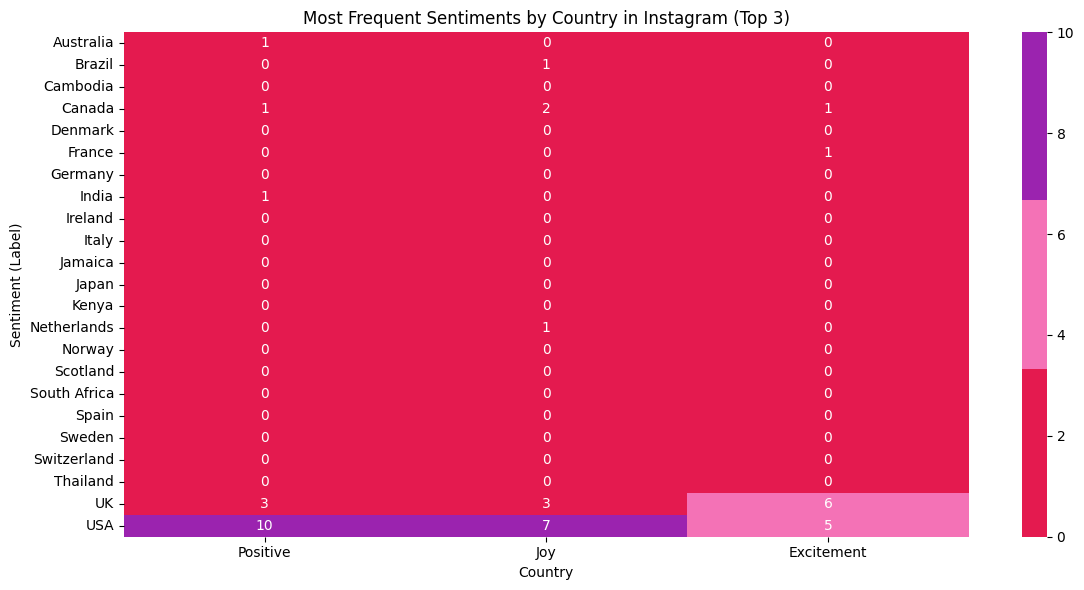

In [49]:
sentiment_counts = (
   instagram_df.groupby(['Country', 'Sentiment (Label)'])['Sentiment (Label)']
    .count()
    .unstack(fill_value=0)
)

plt.figure(figsize=(12, 6))
top_sentiments = sentiment_counts.sum(axis=0).sort_values(ascending=False).head(3).index

filtered_counts = sentiment_counts[top_sentiments]

sn.heatmap(filtered_counts, annot=True, cmap = instagram_colors)
plt.xlabel("Country")
plt.ylabel("Sentiment (Label)")
plt.title("Most Frequent Sentiments by Country in Instagram (Top 3)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Twitter

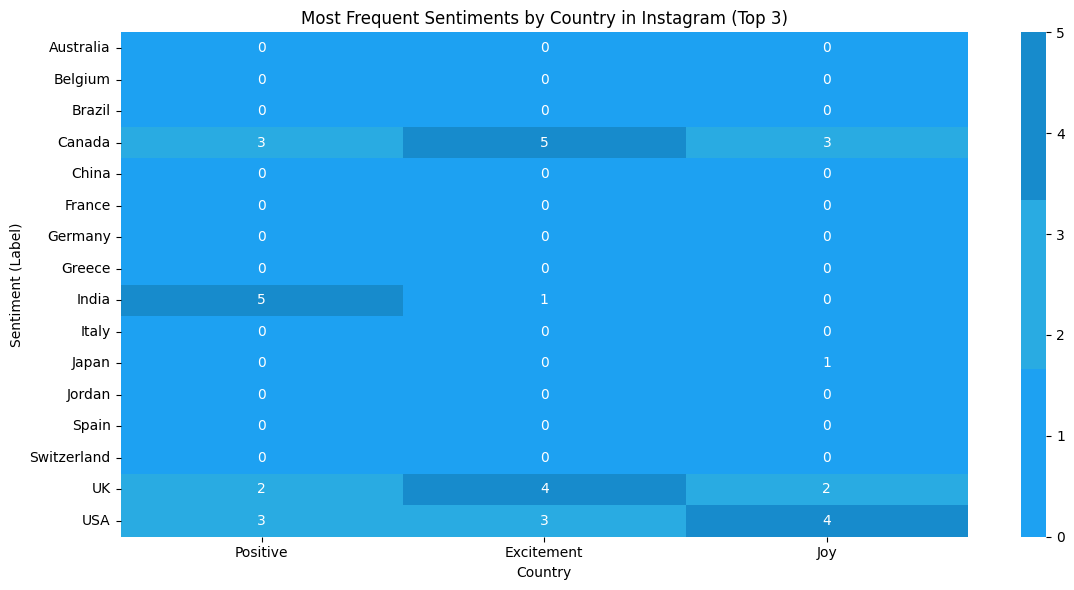

In [50]:
sentiment_counts = (
   twitter_df.groupby(['Country', 'Sentiment (Label)'])['Sentiment (Label)']
    .count()
    .unstack(fill_value=0)
)
plt.figure(figsize=(12, 6))

top_sentiments = sentiment_counts.sum(axis=0).sort_values(ascending=False).head(3).index

filtered_counts = sentiment_counts[top_sentiments]

sn.heatmap(filtered_counts, annot=True, cmap = twitter_colors)  # Adjust colormap as desired
plt.xlabel("Country")
plt.ylabel("Sentiment (Label)")
plt.title("Most Frequent Sentiments by Country in Instagram (Top 3)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Facebook

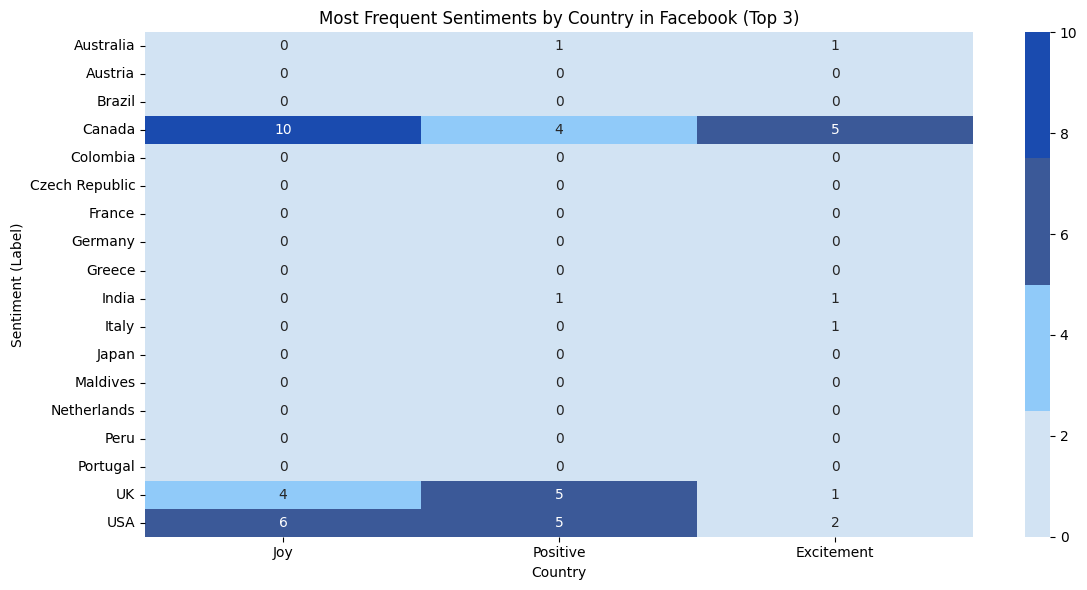

In [51]:
sentiment_counts = (
   facebook_df.groupby(['Country', 'Sentiment (Label)'])['Sentiment (Label)']
    .count()
    .unstack(fill_value=0)
)

plt.figure(figsize=(12, 6))
top_sentiments = sentiment_counts.sum(axis=0).sort_values(ascending=False).head(3).index

filtered_counts = sentiment_counts[top_sentiments]

sn.heatmap(filtered_counts, annot=True, cmap = facebook_colors)
plt.xlabel("Country")
plt.ylabel("Sentiment (Label)")
plt.title("Most Frequent Sentiments by Country in Facebook (Top 3)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### What Hour has The Most Likes Interactions?

#### Instagram

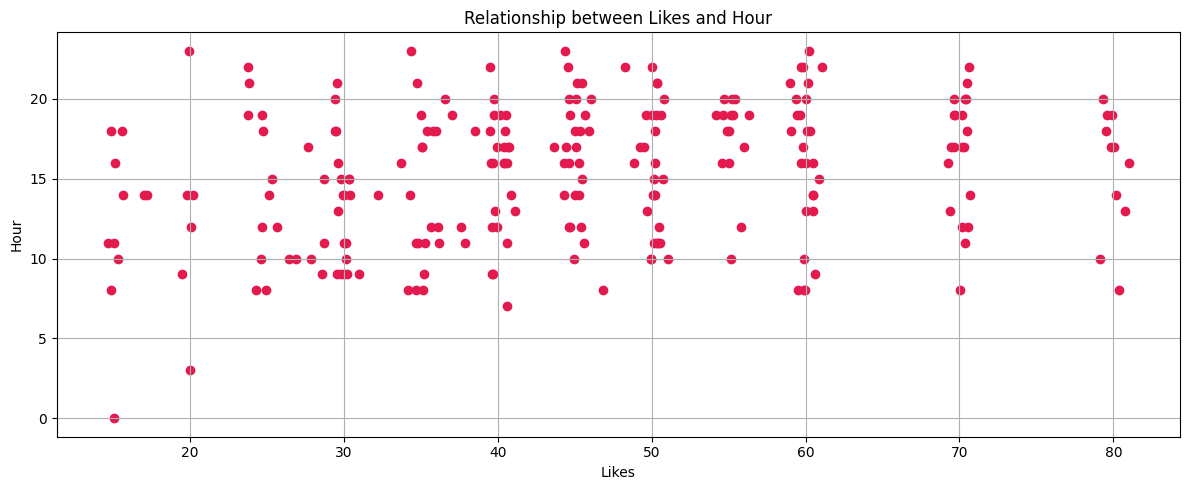

In [52]:
plt.figure(figsize=(12, 5))
plt.scatter(instagram_df['Likes'] + np.random.randn(len(instagram_df)) * 0.5, instagram_df['Hour'], c=instagram_colors[0])

# Customize plot elements
plt.xlabel('Likes')
plt.ylabel('Hour')
plt.title('Relationship between Likes and Hour')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Twitter

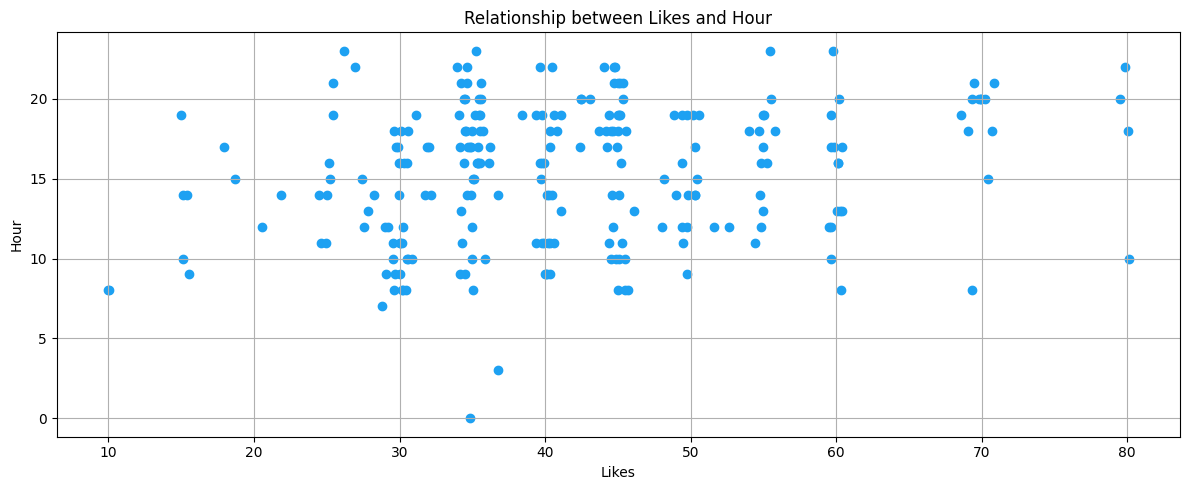

In [53]:
plt.figure(figsize=(12, 5))
plt.scatter(twitter_df['Likes'] + np.random.randn(len(twitter_df)) * 0.5, twitter_df['Hour'], c=twitter_colors[0])
plt.xlabel('Likes')
plt.ylabel('Hour')
plt.title('Relationship between Likes and Hour')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Facebook

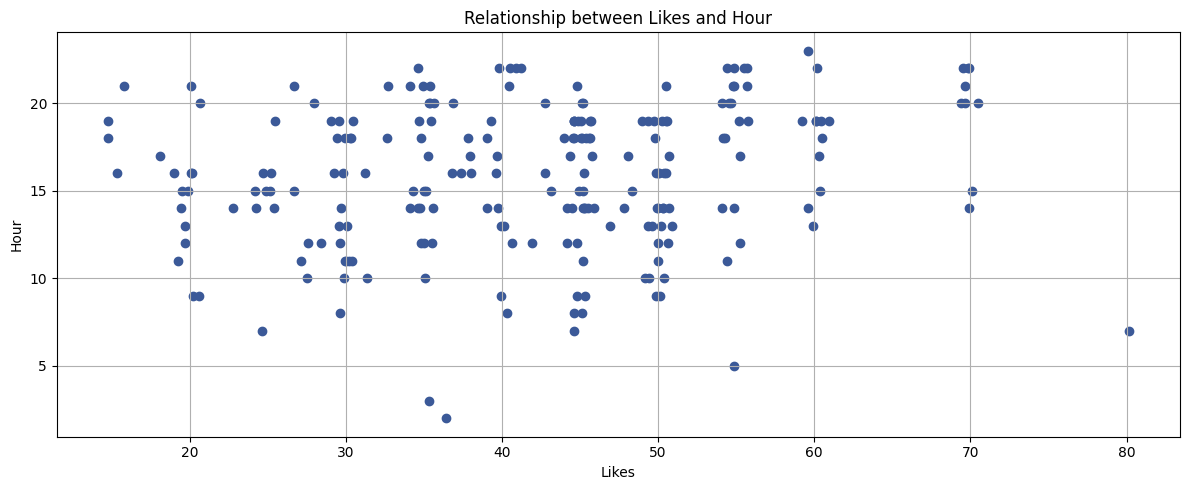

In [54]:
plt.figure(figsize=(12, 5))
plt.scatter(facebook_df['Likes'] + np.random.randn(len(facebook_df)) * 0.5, facebook_df['Hour'], c=facebook_colors[2])

plt.xlabel('Likes')
plt.ylabel('Hour')
plt.title('Relationship between Likes and Hour')
plt.grid(True)
plt.tight_layout()
plt.show()

### What are The Most Liked Topics?

#### Instagram

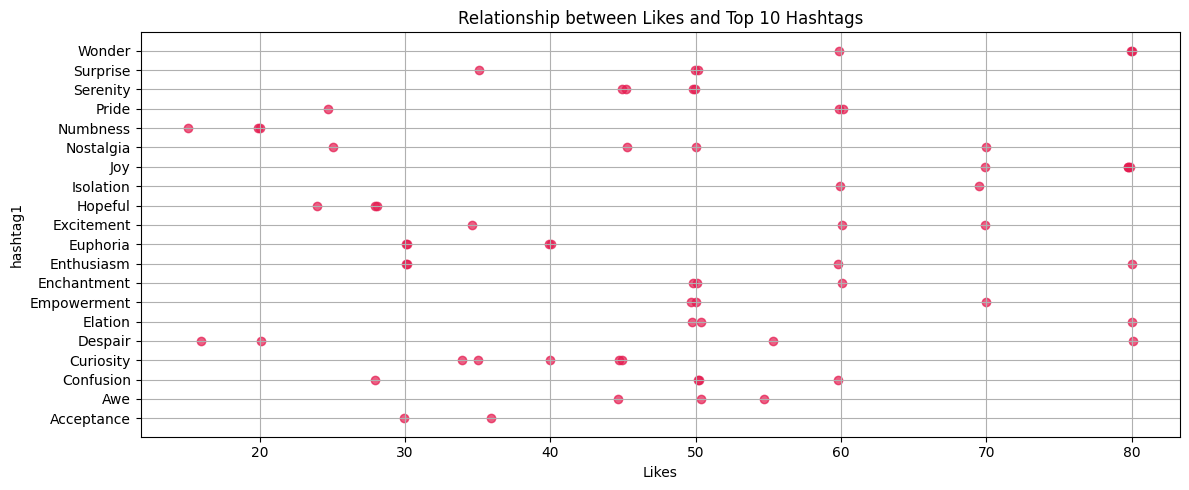

In [55]:
hashtag_counts = instagram_df['hashtag1'].value_counts().head(20) + instagram_df['hashtag2'].value_counts().head(20) 

plt.figure(figsize=(12, 5))
for hashtag, count in hashtag_counts.items():
    filtered_df = instagram_df[instagram_df['hashtag1'] == hashtag]
    plt.scatter(filtered_df['Likes'] + np.random.randn(len(filtered_df)) * 0.2, [hashtag] * len(filtered_df)
                , c=instagram_colors[0], alpha=0.7)

plt.xlabel('Likes')
plt.ylabel('hashtag1')
plt.title('Relationship between Likes and Top 10 Hashtags')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Twitter

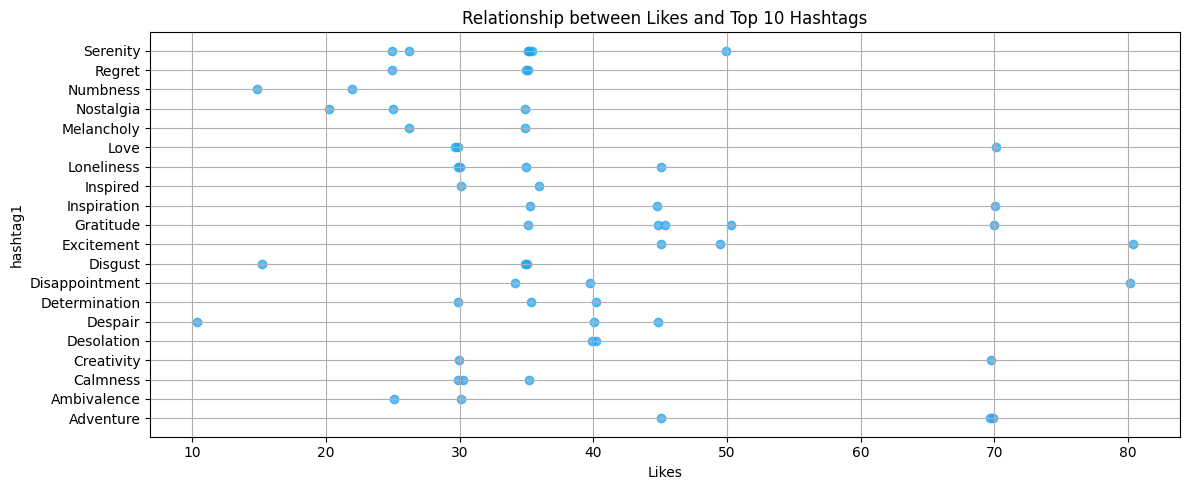

In [56]:

hashtag_counts = twitter_df['hashtag1'].value_counts().head(20) + twitter_df['hashtag2'].value_counts().head(20)

plt.figure(figsize=(12, 5))
for hashtag, count in hashtag_counts.items():
    filtered_df = twitter_df[twitter_df['hashtag1'] == hashtag]
    plt.scatter(filtered_df['Likes'] + np.random.randn(len(filtered_df)) * 0.2, [hashtag] * len(filtered_df),
                c=twitter_colors[0], alpha=0.7)

plt.xlabel('Likes')
plt.ylabel('hashtag1')
plt.title('Relationship between Likes and Top 10 Hashtags')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Facebook

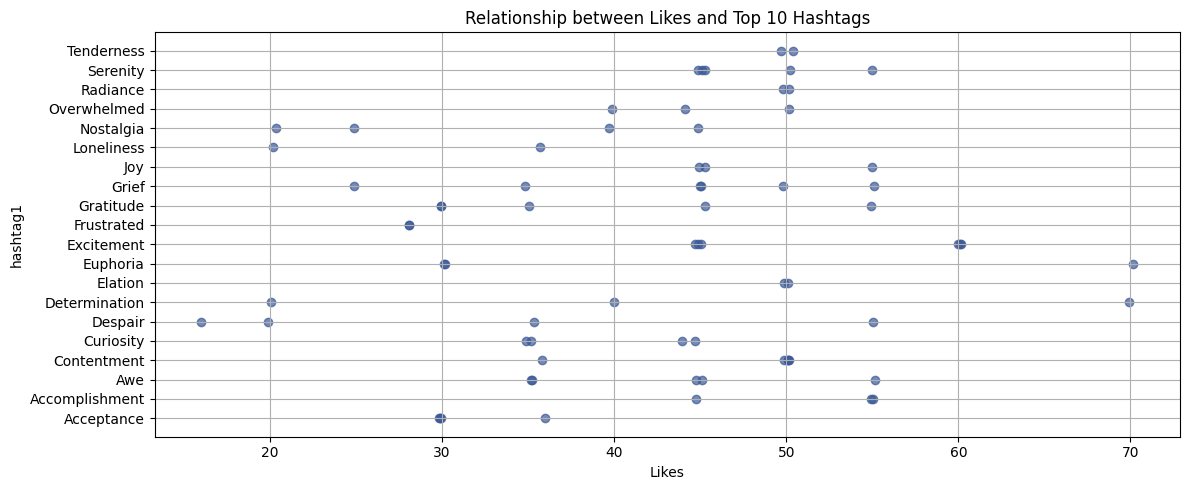

In [57]:
hashtag_counts = facebook_df['hashtag1'].value_counts().head(20) + facebook_df['hashtag2'].value_counts().head(20)

plt.figure(figsize=(12, 5))
for hashtag, count in hashtag_counts.items():
    filtered_df = facebook_df[facebook_df['hashtag1'] == hashtag]
    plt.scatter(filtered_df['Likes'] + np.random.randn(len(filtered_df)) * 0.2, [hashtag] * len(filtered_df), 
                c=facebook_colors[2], alpha=0.7)

# Customize plot elements
plt.xlabel('Likes')
plt.ylabel('hashtag1')
plt.title('Relationship between Likes and Top 10 Hashtags')
plt.grid(True)
plt.tight_layout()
plt.show()

### Distribution of Sentiment Labels Across Different Users

#### Instagram

<Figure size 2000x600 with 0 Axes>

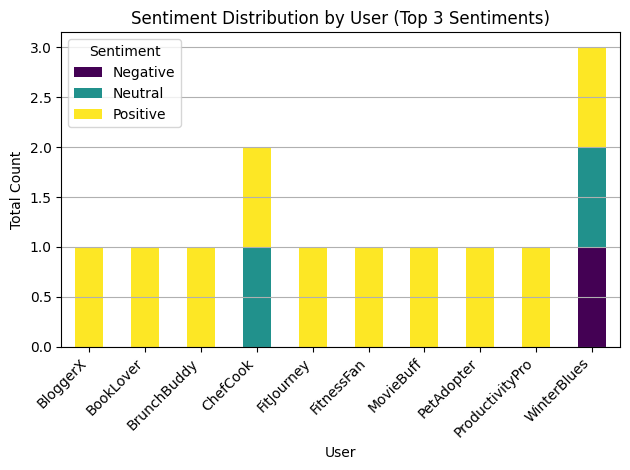

In [60]:
contingency_table = pd.crosstab(instagram_df['User'].head(10), instagram_df['Sentiment (Label)'].head(10))

top_sentiments = contingency_table.columns[:3]
contingency_table_subset = contingency_table[top_sentiments]

contingency_table_subset = contingency_table_subset.cumsum(axis=1)

user_ids = contingency_table_subset.index.to_numpy()

plt.figure(figsize=(20, 6))

contingency_table_subset.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('User')
plt.ylabel('Total Count')
plt.title('Sentiment Distribution by User (Top 3 Sentiments)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', labels=top_sentiments.to_list())
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Twitter

<Figure size 2000x600 with 0 Axes>

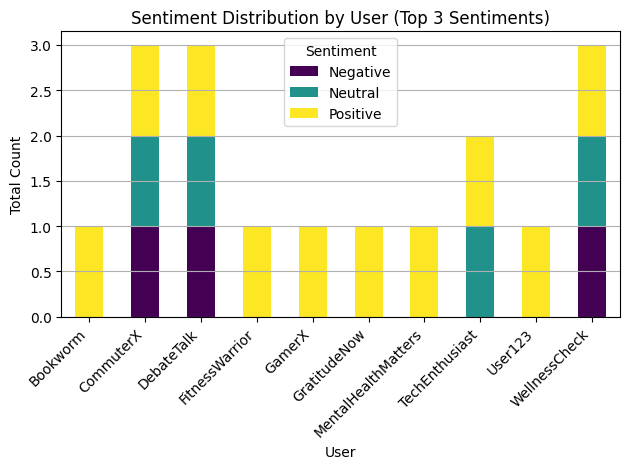

In [61]:
contingency_table = pd.crosstab(twitter_df['User'].head(10), twitter_df['Sentiment (Label)'].head(10))

top_sentiments = contingency_table.columns[:3]
contingency_table_subset = contingency_table[top_sentiments]

contingency_table_subset = contingency_table_subset.cumsum(axis=1)

user_ids = contingency_table_subset.index.to_numpy()

plt.figure(figsize=(20, 6))

contingency_table_subset.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('User')
plt.ylabel('Total Count')
plt.title('Sentiment Distribution by User (Top 3 Sentiments)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', labels=top_sentiments.to_list())
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Facebook

<Figure size 2000x600 with 0 Axes>

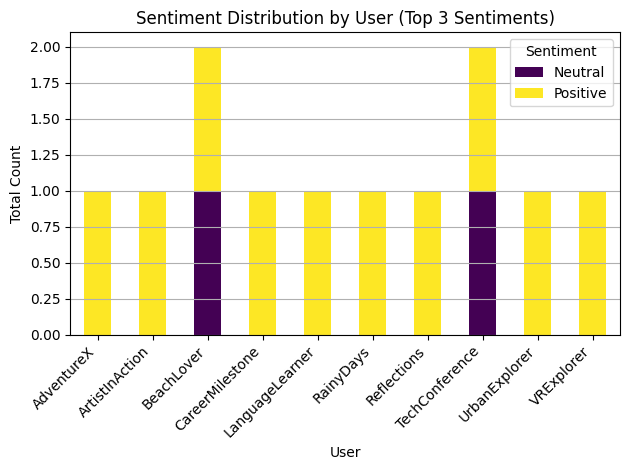

In [62]:
contingency_table = pd.crosstab(facebook_df['User'].head(10), facebook_df['Sentiment (Label)'].head(10))

top_sentiments = contingency_table.columns[:3]
contingency_table_subset = contingency_table[top_sentiments]

contingency_table_subset = contingency_table_subset.cumsum(axis=1)

user_ids = contingency_table_subset.index.to_numpy()

plt.figure(figsize=(20, 6))

contingency_table_subset.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('User')
plt.ylabel('Total Count')
plt.title('Sentiment Distribution by User (Top 3 Sentiments)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', labels=top_sentiments.to_list())
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Step 4: Premodelling Phase

-------

## Step 5: Modelling

-----

## Conclusion